
# Project: Investigate The No-Show dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In This Section we will try to invesitage a dataset of 100k patients in Brazil and try to come up with questions and conlcusions regarding the 30% of them not going to their doctor's appointments


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#read csv file into panda series
df_ap = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
def Pie_Chart(width,height,first_ratio,second_ratio,first_label='first_label',second_label='second_label',title='title'):
    sns.set()
    fig = plt.figure(figsize =(width, height))
    plt.pie([first_ratio, second_ratio], labels = [first_label,second_label], colors=['r','g'],autopct='%.2f')
    plt.legend()
    plt.title(title)
    plt.show()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> Looking at just the head of the data it is clear that appointmentId will not be a useful coloumn for our analysis so we'll drop it for every appointment id is unique and not quite helpful

In [4]:
df_ap.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> The data has 110527 entries and 14 columns but we will check for duplicates, NaNs and not useful coloumns as we proceed

In [5]:
df_ap.shape

(110527, 14)

> It appears SchedueledDay and AppointmentDay need to be changed to datetime format

In [6]:
df_ap.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> No Null in any of the rows which is a good thing

In [7]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Turns out there is number of duplicated Patiend Ids but that doesn't concern us because the appoitnments ids have no duplicates so those patients have made more than one appointment which is fine by us

In [8]:
df_ap.duplicated(subset='PatientId', keep='first').sum()

48228

In [9]:
df_ap.duplicated(subset='AppointmentID', keep='first').sum()

0

> There are more female patients than male with 71840 female and 38687 male, 64.9% Female and 35.002 % male

In [10]:
df_ap['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [11]:
(df_ap['Gender'].value_counts()/df_ap['Gender'].count())*100

F    64.997693
M    35.002307
Name: Gender, dtype: float64

> It appears that there's one age value that is -1 which doesn't make sense so we need to drop this value later
>> Most of the patients are between 0 and 65 years, few above 65 and outlier at 115

In [12]:
#To get a quick overview about the different values of age coloumn
df_ap['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

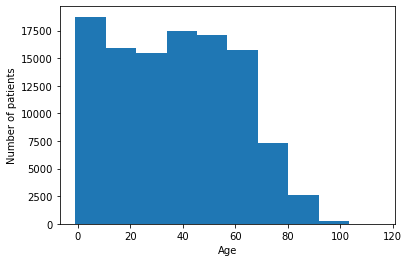

In [13]:
plt.hist(df_ap["Age"]);
plt.xlabel('Age');
plt.ylabel('Number of patients');

> We will convert all of Neighbourhood coloumn to title format for easier approach

In [14]:
#to get a quick review of different unique neighbourhood values, and their number
df_ap['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

> Last 10 characters in appointmentDay have no meaning they all have the same data "T00:00:00Z", we need to clear those characters

In [15]:
df_ap['AppointmentDay'].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

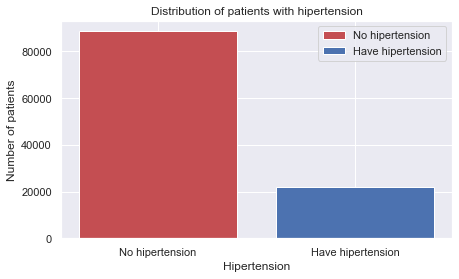

In [16]:
sns.set()
fig = plt.figure(figsize =(7, 4))
#first bar is for people with no hipertension in red color
plt.bar('No hipertension', df_ap['Hipertension'].value_counts().values[0], label='No hipertension', color='r')
#second bar for people with hipertension with blue color
plt.bar('Have hipertension', df_ap['Hipertension'].value_counts().values[1], label='Have hipertension', color='b')
plt.ylabel('Number of patients')
plt.xlabel('Hipertension')
plt.title('Distribution of patients with hipertension')
plt.legend()
plt.show()

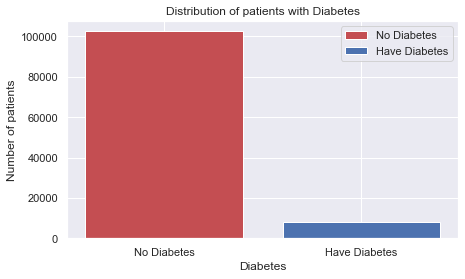

In [17]:
sns.set()
fig = plt.figure(figsize =(7, 4))
plt.bar('No Diabetes', df_ap['Diabetes'].value_counts().values[0], label='No Diabetes', color='r')
plt.bar('Have Diabetes', df_ap['Diabetes'].value_counts().values[1], label='Have Diabetes', color='b')
plt.ylabel('Number of patients')
plt.xlabel('Diabetes')
plt.title('Distribution of patients with Diabetes')
plt.legend()
plt.show()

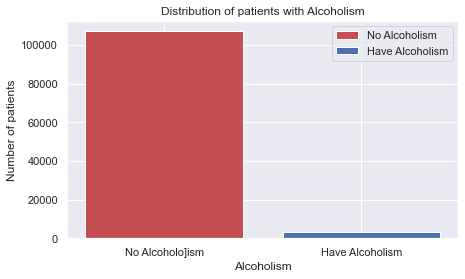

In [18]:
sns.set()
fig = plt.figure(figsize =(7, 4))
plt.bar('No Alcoholo]ism', df_ap['Alcoholism'].value_counts().values[0], label='No Alcoholism', color='r')
plt.bar('Have Alcoholism', df_ap['Alcoholism'].value_counts().values[1], label='Have Alcoholism', color='b')
plt.ylabel('Number of patients')
plt.xlabel('Alcoholism')
plt.title('Distribution of patients with Alcoholism')
plt.legend()
plt.show()

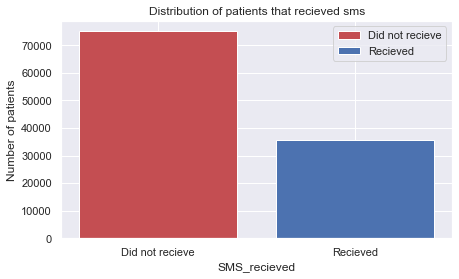

In [19]:
sns.set()
fig = plt.figure(figsize =(7, 4))
plt.bar('Did not recieve', df_ap['SMS_received'].value_counts().values[0], label='Did not recieve', color='r')
plt.bar('Recieved', df_ap['SMS_received'].value_counts().values[1], label='Recieved', color='b')
plt.ylabel('Number of patients')
plt.xlabel('SMS_recieved')
plt.title('Distribution of patients that recieved sms')
plt.legend()
plt.show()

> Turns out the handcap has 4 levels but there is no reason to keep it this way so we will change the coloumn to 1 and 0

In [20]:
#quick review of unique values of handcap colomn and their respective occurences
df_ap['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [21]:
#quick review of the proportion of people that have handcap and didn't or did show to an appointment
df_ap.groupby("Handcap")["No-show"].value_counts()

Handcap  No-show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: No-show, dtype: int64

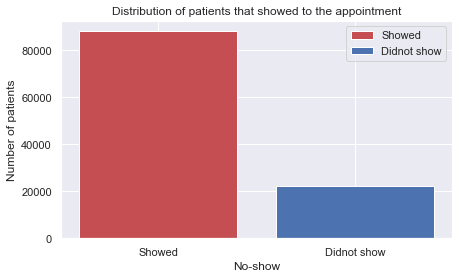

In [22]:
sns.set()
fig = plt.figure(figsize =(7, 4))
plt.bar('Showed', df_ap['No-show'].value_counts().values[0], label='Showed', color='r')
plt.bar('Didnot show' , df_ap['No-show'].value_counts().values[1], label='Didnot show', color='b')
plt.ylabel('Number of patients')
plt.xlabel('No-show')
plt.title('Distribution of patients that showed to the appointment')
plt.legend()
plt.show()

> To make sure that appointmentid is unique accross the dataset and prove that we won't need this coloumn

In [23]:
df_ap['AppointmentID'].is_unique

True


### Data Cleaning 

>Dropping the appointmentID as we discussed it is not useful for the analysis

In [24]:
#dropping appointment Id with inplace set to true to overwrite the existing data series
df_ap.drop('AppointmentID', axis=1, inplace = True)

>Drop Last 10 characters from appointmentDay colomn and therefore Schedueled day because the time will have no meaning

In [25]:
#Two lines of slicing to remove last 10 charaters in both belwo colomns
df_ap['AppointmentDay'] = df_ap['AppointmentDay'].str[:-10]
df_ap['ScheduledDay'] = df_ap['ScheduledDay'].str[:-10]

In [26]:
df_ap['AppointmentDay'].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: AppointmentDay, dtype: object

>Change AppointmentDay and SchedueledDay to datetime Format

In [27]:
df_ap['AppointmentDay'] = pd.to_datetime(df_ap['AppointmentDay'])
df_ap['ScheduledDay'] = pd.to_datetime(df_ap['ScheduledDay'])

In [28]:
#checking for types of both appointmentDay and scheduledDay colomn
print(df_ap['AppointmentDay'].dtypes)
print(df_ap['ScheduledDay'].dtypes)

datetime64[ns]
datetime64[ns]


> Drop negative age values

In [29]:
df_ap.drop(df_ap[df_ap['Age']< 0].index[0], inplace=True)

In [30]:
#to make sure we dropped all negative values in age colomn
df_ap['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

>Change Neighbourhood colomn to title format

In [31]:
df_ap['Neighbourhood'] = df_ap['Neighbourhood'].str.title()

>Creating a coloumn with difference between appointment day and scheduled day

In [32]:
df_ap['Days'] = df_ap['AppointmentDay'] - df_ap['ScheduledDay']

In [33]:
#checking for Days colomn datatype
print(df_ap['Days'].dtypes)

timedelta64[ns]


In [34]:
df_ap['Days'].value_counts()

0 days      38562
2 days       6725
4 days       5290
1 days       5213
7 days       4906
            ...  
82 days         1
127 days        1
126 days        1
151 days        1
123 days        1
Name: Days, Length: 131, dtype: int64

In [35]:
#Changing Days colomn data type to in64
df_ap['Days'] = df_ap['Days'].dt.days

In [36]:
#checking that above block was successful
print(df_ap['Days'].dtypes)

int64


In [37]:
#Checking for negative Days value
df_ap[df_ap['Days'] < 0 ]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days
27033,7.839273e+12,M,2016-05-10,2016-05-09,38,Resistência,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,F,2016-05-18,2016-05-17,19,Santo Antônio,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,F,2016-05-05,2016-05-04,22,Consolação,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,F,2016-05-11,2016-05-05,81,Santo Antônio,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,M,2016-05-04,2016-05-03,7,Tabuazeiro,0,0,0,0,0,0,Yes,-1


>Dropping days values which are negative, the shouldn't be there

In [38]:
df_ap.drop(df_ap[df_ap['Days'] < 0 ].index, inplace=True)

In [39]:
#checking again that there are no negative days values
df_ap[df_ap['Days'] < 0 ]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days


> Create a new coloumn with scheduled day of the week for analysis 

In [40]:
#Creating new coloumn from ScheduledDay coloumn with the name of the day from datetime format
df_ap['ScheduledDayOfWeek'] = pd.to_datetime(df_ap['ScheduledDay']).dt.day_name()

In [41]:
#changing all values above 1 in handcap colomn to 1 
df_ap['Handcap'] = np.where(df_ap['Handcap'] > 1, 1, df_ap['Handcap'])

In [42]:
#checking that last block did the job well
df_ap['Handcap'].value_counts()

0    108282
1      2239
Name: Handcap, dtype: int64

In [43]:
#Rename No-show colomn to No_show
df_ap.rename(columns = {'No-show':'No_show'}, inplace = True)

> Creates two new dataframes to seperate who showed and didn't show for easier analysis for the upcoming explanatory questions

In [44]:
df_noShow=df_ap.query("No_show == 'Yes'")                      

In [45]:
df_YesShow=df_ap.query("No_show == 'No'")  

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
#### Does the difference between day of appointment and scheduling have an effect on patients showing up to the appointment??

In [46]:
#checking unique values of days colomn
df_ap['Days'].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
132        1
125        1
117        1
146        1
123        1
Name: Days, Length: 129, dtype: int64

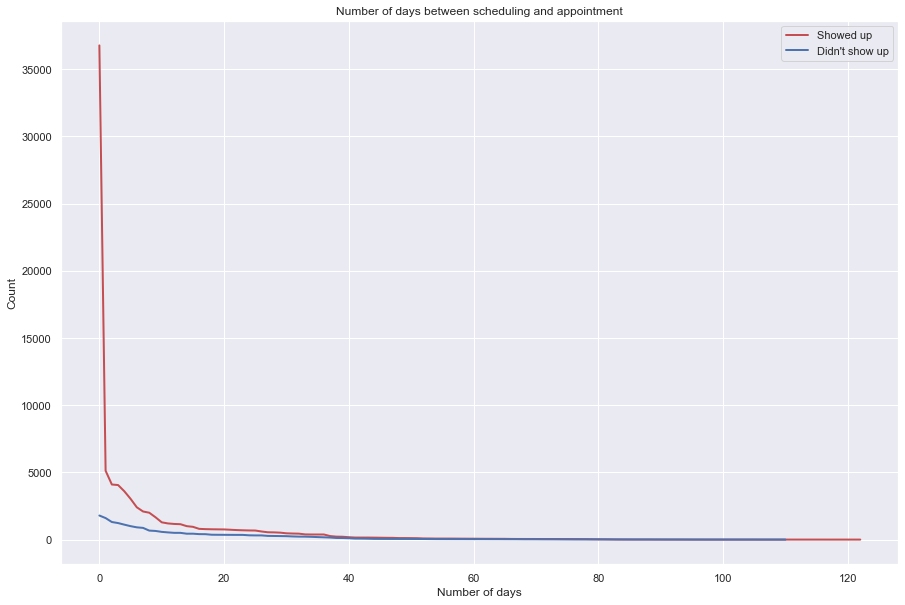

In [47]:
sns.set()
fig = plt.figure(figsize =(15, 10))
plt.plot(df_YesShow['Days'].value_counts()[0:123].values, label='Showed up', color = 'r', linewidth=2)
plt.plot(df_noShow['Days'].value_counts()[0:123].values, label='Didn\'t show up', color = 'b', linewidth=2)
plt.ylabel('Count')
plt.xlabel('Number of days')
plt.title('Number of days between scheduling and appointment')
plt.legend()
plt.show()

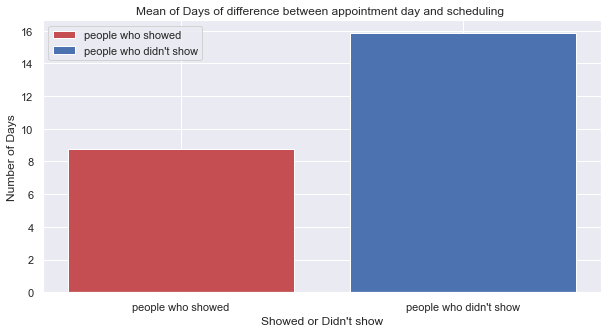

In [48]:
#creatig a bar chart from the mean of Days of difference between appointment day and scheduling to know who has the highest mean 
#between the two groups
sns.set()
fig = plt.figure(figsize =(10, 5))
plt.bar('people who showed', df_YesShow['Days'].mean(), label='people who showed', color='r')
plt.bar('people who didn\'t show', df_noShow['Days'].mean(), label='people who didn\'t show', color='b')
plt.ylabel('Number of Days')
plt.xlabel('Showed or Didn\'t show')
plt.title('Mean of Days of difference between appointment day and scheduling ')
plt.legend()
plt.show()

In [49]:
#getting proportions of people who scheduled their appointment on the same day of their appointment for those who showed
#and those who didn't
showed_on_same_day = df_YesShow['Days'].value_counts()[0]   / df_ap[df_ap['Days']==0]['No_show'].value_counts().sum()
didnot_show_on_same_day=df_noShow['Days'].value_counts()[0] / df_ap[df_ap['Days']==0]['No_show'].value_counts().sum()

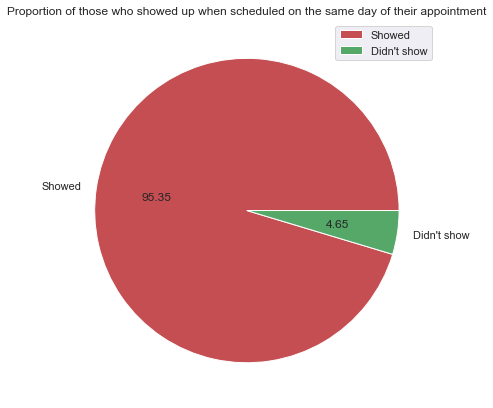

In [51]:
Pie_Chart(10,7,showed_on_same_day,didnot_show_on_same_day,first_label='Showed',second_label='Didn\'t show',
         title='Proportion of those who showed up when scheduled on the same day of their appointment')

> Turns out that people who schedules an appointment with a short span from the appointment day tend to show up to the appointment with people scheduling on the same day of their appointment show up the most

### Research Question 2  
#### Which features (Gender, Diabetes, Alcoholism, Handcap, Hypertension, Scholarship) are related to whether the patient will show up or not?

> We will Start with gender feature, as we discussed above the number of female are patients are way higher than male so we will normalize the two genders' number first so the analysis won't be biases or misleading


In [52]:
#Get first value in Gender for total females and second value for total males
Total_female=df_ap['Gender'].value_counts()[0]
Total_male=df_ap['Gender'].value_counts()[1]
#Get first value in Gender in noShow data series for females who didn't show up and second value for males
female = df_noShow['Gender'].value_counts()[0]
male = df_noShow['Gender'].value_counts()[1]
#Normalizing both values
female_ratio=female/Total_female
male_ratio=male/Total_male

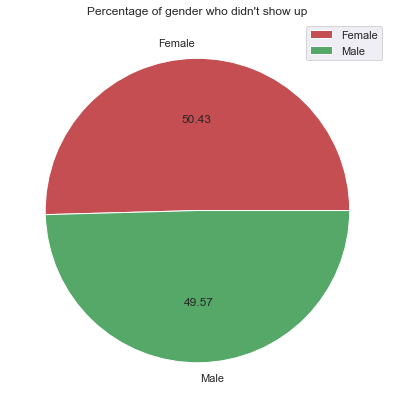

In [54]:
Pie_Chart(10,7,female_ratio*100,male_ratio*100,first_label='Female',second_label='Male',
         title='Percentage of gender who didn\'t show up')

> Turns out genders have no influence on wether the patient is going to show up or not

Next, we will investigate patients with diabetes

In [56]:
#Get second entry in Diabetes colomn for total number of people with diabetes
total_diabetes = df_ap['Diabetes'].value_counts()[1]
#Getting values for people who has diabetes in both show and didn't show dataframes
show_diabetes = df_YesShow['Diabetes'].value_counts()[1]/total_diabetes
noshow_diabetes = df_noShow['Diabetes'].value_counts()[1]/total_diabetes

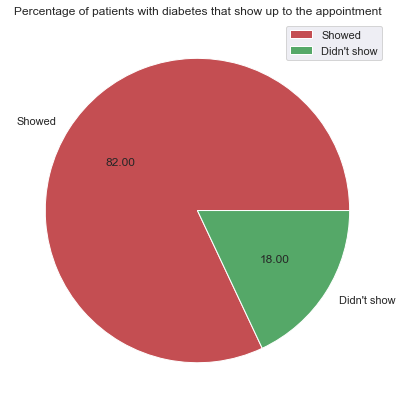

In [57]:
Pie_Chart(10,7,show_diabetes*100,noshow_diabetes*100,first_label='Showed',second_label='Didn\'t show',
         title='Percentage of patients with diabetes that show up to the appointment')

> 82 % percent of patients that have diabetes show up to the appointment therefore it is clear that diabetes is a factor that affects patients showing up

Next, we will investigate patients with Alcoholism

In [58]:
#Get second entry in Alcoholism colomn for total number of people with diabetes
total_alcoholism = df_ap['Alcoholism'].value_counts()[1]
#Getting values for people who has Alcholism in both show and didn't show dataframes
show_alcoholism = df_YesShow['Alcoholism'].value_counts()[1]/total_alcoholism
noshow_alcoholism = df_noShow['Alcoholism'].value_counts()[1]/total_alcoholism

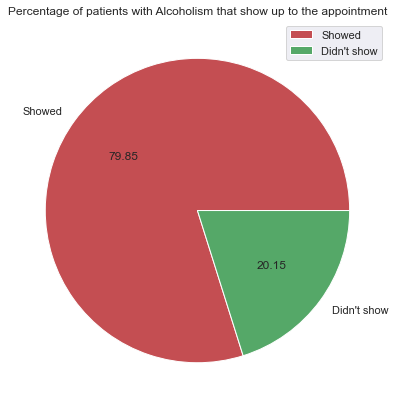

In [59]:
Pie_Chart(10,7,show_alcoholism*100,noshow_alcoholism*100,first_label='Showed',second_label='Didn\'t show',
         title='Percentage of patients with Alcoholism that show up to the appointment')

> Apprixmately 80% with alcoholism show up to the appointment, therefore it is a factor that affects patients showing up

Next we will investigate the handcap feature

In [60]:
#Get second entry in Handcap colomn for total number of people with diabetes
total_handcap = df_ap['Handcap'].value_counts()[1]
#Getting values for people who has Handcap in both show and didn't show dataframes
show_handcap = df_YesShow['Handcap'].value_counts()[1]/total_handcap
noshow_handcap = df_noShow['Handcap'].value_counts()[1]/total_handcap

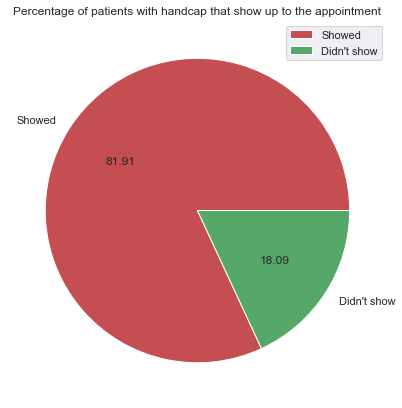

In [61]:
Pie_Chart(10,7,show_handcap*100,noshow_handcap*100,first_label='Showed',second_label='Didn\'t show',
         title='Percentage of patients with handcap that show up to the appointment')

>Apprixmately 82% with handcap show up to the appointment, therefore it is a factor that affects patients showing up

Next we will investigae hypertension feature

In [62]:
#Get second entry in Hipertension colomn for total number of people with diabetes
total_hipertension = df_ap['Hipertension'].value_counts()[1]
#Getting values for people who has Hipertension in both show and didn't show dataframes
show_hipertension = df_YesShow['Hipertension'].value_counts()[1]/total_hipertension
noshow_hipertension = df_noShow['Hipertension'].value_counts()[1]/total_hipertension

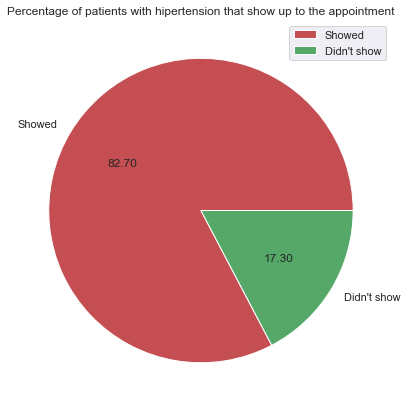

In [63]:
Pie_Chart(10,7,show_hipertension*100,noshow_hipertension*100,first_label='Showed',second_label='Didn\'t show',
         title='Percentage of patients with hipertension that show up to the appointment')


>Apprixmately 82% with hipertension show up to the appointment, therefore it is a factor that affects patients showing up

Next, we will investigate people with scholarships

In [64]:
#Get second entry in Scholarship colomn for total number of people with diabetes
total_schol = df_ap['Scholarship'].value_counts()[1]
#Getting values for people who has Scholarship in both show and didn't show dataframes
show_schol = df_YesShow['Scholarship'].value_counts()[1]/total_hipertension
noshow_schol = df_noShow['Scholarship'].value_counts()[1]/total_hipertension

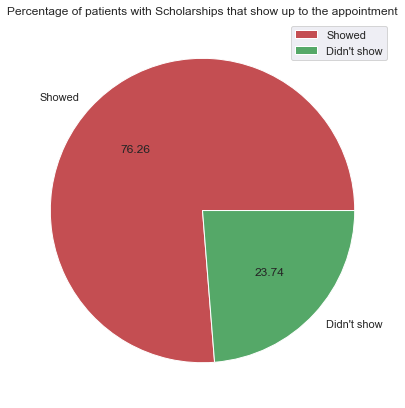

In [65]:
Pie_Chart(10,7,show_schol*100,noshow_schol*100,first_label='Showed',second_label='Didn\'t show',
         title='Percentage of patients with Scholarships that show up to the appointment')


>Apprixmately 76% with Scholarships show up to the appointment, therefore it is a factor that affects patients showing up

### Research Question 3
#### Which appointment day of the week have the most people showing up or not showing up? Is there any correlation between days and not showin up?

First, to tackle this question we will need to make a list for length of every day of the week (How many people scheduled for an appointment on this same day?)

In [66]:
#Creating a list with number of people appointed to each day in the week minus Sunday
week_days = [len(df_ap[df_ap['ScheduledDayOfWeek']=='Monday']),len(df_ap[df_ap['ScheduledDayOfWeek']=='Tuesday']),len(df_ap[df_ap['ScheduledDayOfWeek']=='Wednesday']),len(df_ap[df_ap['ScheduledDayOfWeek']=='Thursday']),len(df_ap[df_ap['ScheduledDayOfWeek']=='Friday']),len(df_ap[df_ap['ScheduledDayOfWeek']=='Saturday'])]
#Creating a list of labels by the names of the days of the week started by monday and ending with saturday
labels = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday']

Next we will create two new lists with proportion of patients who scheduled on the same day, one for who showed up and one for who didn't show.
The proportion is part is important to make sure that values of day weeks are normalized to get accurate statstics

In [67]:
show_days = [len(df_YesShow[df_YesShow['ScheduledDayOfWeek']=='Monday'])/week_days[0], len(df_YesShow[df_YesShow['ScheduledDayOfWeek']=='Tuesday'])/week_days[1] ,len(df_YesShow[df_YesShow['ScheduledDayOfWeek']=='Wednesday'])/week_days[2],len(df_YesShow[df_YesShow['ScheduledDayOfWeek']=='Thursday'])/week_days[3],len(df_YesShow[df_YesShow['ScheduledDayOfWeek']=='Friday'])/week_days[4],len(df_YesShow[df_YesShow['ScheduledDayOfWeek']=='Saturday'])/week_days[5]]

noshow_days = [len(df_noShow[df_noShow['ScheduledDayOfWeek']=='Monday'])/week_days[0], len(df_noShow[df_noShow['ScheduledDayOfWeek']=='Tuesday'])/week_days[1] ,len(df_noShow[df_noShow['ScheduledDayOfWeek']=='Wednesday'])/week_days[2],len(df_noShow[df_noShow['ScheduledDayOfWeek']=='Thursday'])/week_days[3],len(df_noShow[df_noShow['ScheduledDayOfWeek']=='Friday'])/week_days[4],len(df_noShow[df_noShow['ScheduledDayOfWeek']=='Saturday'])/week_days[5]]

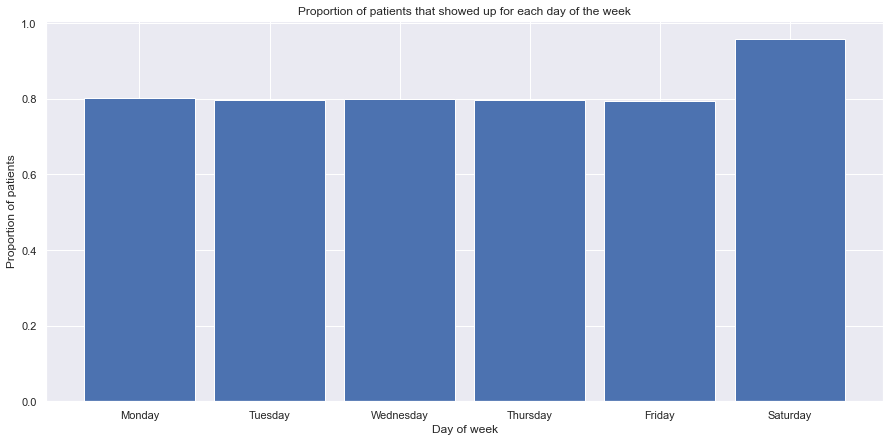

In [68]:
sns.set()
width = 0.85
plt.figure(figsize=(15,7))
plt.bar(labels, show_days, width)
plt.title('Proportion of patients that showed up for each day of the week')
plt.xlabel('Day of week')
plt.ylabel('Proportion of patients')
plt.xticks(labels)
plt.show()

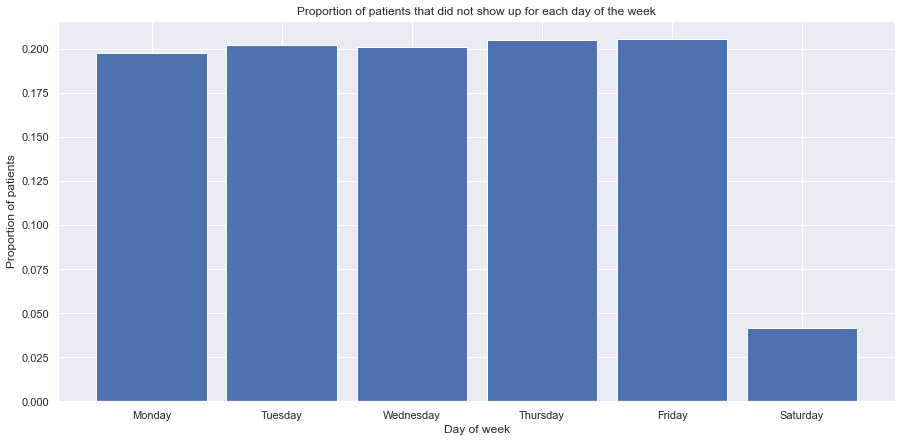

In [69]:
sns.set()
width = 0.85
plt.figure(figsize=(15,7))
plt.bar(labels, noshow_days, width)
plt.title('Proportion of patients that did not show up for each day of the week')
plt.xlabel('Day of week')
plt.ylabel('Proportion of patients')
plt.xticks(labels)
plt.show()

> It is clear from the above two graphs that schedueled day for the appointment is not a decisive factor in our analysis because all the bars are of same height except saturday which have a higher rate of patients showing up

### Research Question 4
#### Which age group are most likely to show up??

We categorize people into different groups depending on their age using https://www.statcan.gc.ca/en/concepts/definitions/age2 : 

1- Children from 0 - 14

2- Youth    from 15 -24

3- Adults   from 25 - 64

4- Seniors  from 65 and over

We will use the same technique from before in which we get proprtion of these groups to avoid bias and put them into two lists those who showed and those who didn't show

In [70]:
#Creating 4 numbers(groups) by using query on age colomn in show dataframe with the required boundaries and dividing it by
# by another but this time we use the whole data frame,in short we divide number of people in this age group who didn' show to
#the number of people within this age group in all dataset
G1_Show = len(df_YesShow.query('Age <= 14'))/len(df_ap.query('Age < = 14'))
G2_Show = len(df_YesShow.query('15<=Age <=24'))/len(df_ap.query('15<=Age <=24'))
G3_Show = len(df_YesShow.query('25<= Age <= 64'))/len(df_ap.query('25<= Age <= 64'))
G4_Show = len(df_YesShow.query('Age >= 65'))/len(df_ap.query('Age >= 65'))

In [71]:
#Same as previous block but on noshow block
G1_NoShow = len(df_noShow.query('Age <= 14'))/len(df_ap.query('Age < = 14'))
G2_NoShow = len(df_noShow.query('15<=Age <=24'))/len(df_ap.query('15<=Age <=24'))
G3_NoShow = len(df_noShow.query('25<= Age <= 64'))/len(df_ap.query('25<= Age <= 64'))
G4_NoShow = len(df_noShow.query('Age >= 65'))/len(df_ap.query('Age >= 65'))

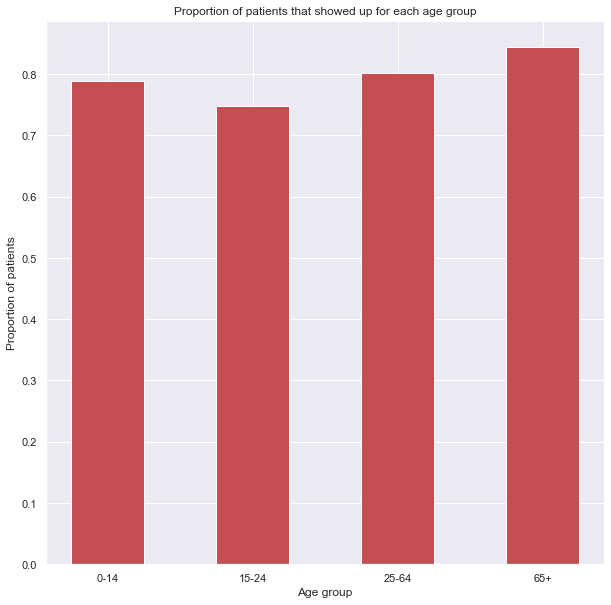

In [72]:
showed_groups = [G1_Show, G2_Show, G3_Show, G4_Show]
labels = ['0-14', '15-24', '25-64', '65+']

sns.set()
width = 0.5
plt.figure(figsize=(10,10))
plt.bar(labels, showed_groups, width, color='r')
plt.title('Proportion of patients that showed up for each age group')
plt.xlabel('Age group')
plt.ylabel('Proportion of patients')
plt.xticks(labels)
plt.show()

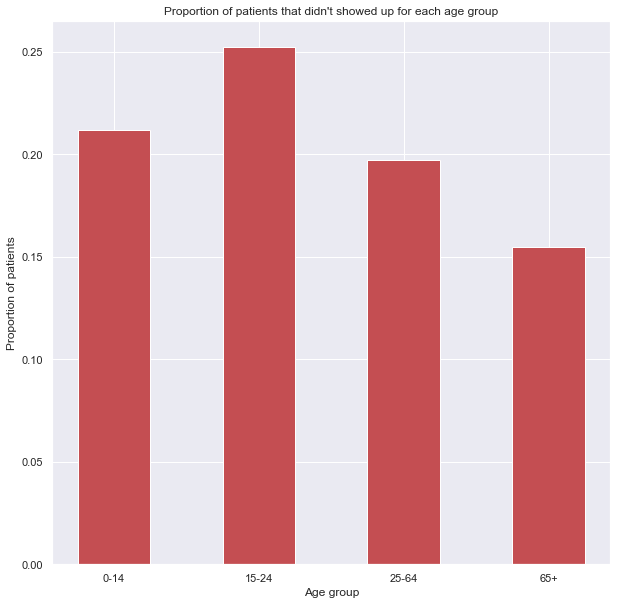

In [73]:
showed_groups = [G1_NoShow, G2_NoShow, G3_NoShow, G4_NoShow]
labels = ['0-14', '15-24', '25-64', '65+']

sns.set()
width = 0.5
plt.figure(figsize=(10,10))
plt.bar(labels, showed_groups, width, color='r')
plt.title('Proportion of patients that didn\'t showed up for each age group')
plt.xlabel('Age group')
plt.ylabel('Proportion of patients')
plt.xticks(labels)
plt.show()

  From the above two graphs we can rank the age groups that most likely will show up to the appointmnet as follows : 
  1. Seniors
 
  2. Adults
 
  3. Children
 
  4. Youth

### Research Question 5
#### Did the patients who recieved an sms have higher showing up rate??

Creating two lists for people who recieved sms and showed up and those who recieved and didn't show up

In [74]:
show_received = df_YesShow['SMS_received'].value_counts()[1]
noshow_received = df_noShow['SMS_received'].value_counts()[1]

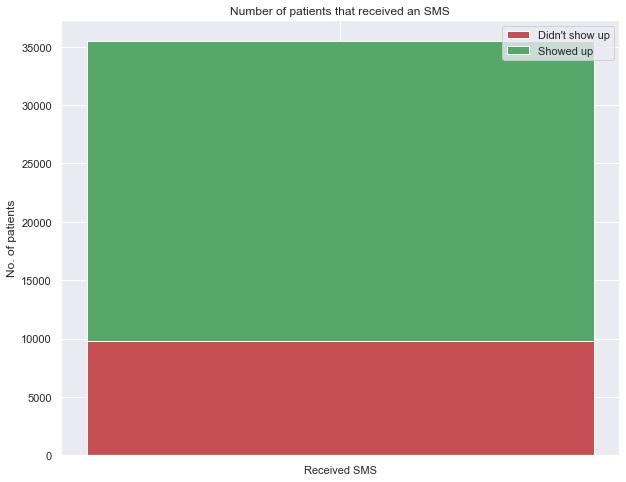

In [75]:
labels = ['Received SMS']
showed = show_received
notshowed = noshow_received
width = 0.1 

sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(labels, notshowed, width, label='Didn\'t show up', color='r')
ax.bar(labels, showed, width, bottom=notshowed, label='Showed up', color='g')

ax.set_ylabel('No. of patients')
ax.set_title('Number of patients that received an SMS')
ax.legend()

plt.show()

In [76]:
total_recieved=df_ap['SMS_received'].value_counts()[1]
show_received_pr  = show_received /total_recieved
noshow_received_pr= noshow_received /total_recieved

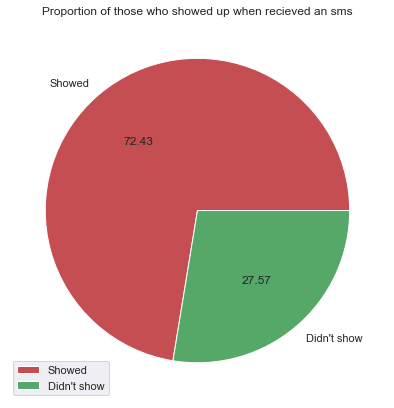

In [77]:
Pie_Chart(10,7,show_received_pr,noshow_received_pr,first_label='Showed',second_label='Didn\'t show',title='Proportion of those who showed up when recieved an sms')

From the above graphs we can see that people who recieved a sms is most likely to show up with approximately 72.43%

<a id='conclusions'></a>
## Conclusions

    - Patients with health problems (Diabetes, Handcap, Hipertension) are most likely to show up to the appointment, patients with alcoholism also are most likely to show up also patients which recieved sms is most likely to show up
    -The average of days between schedul day and appointment day for people who don't show up is higher than those who do show up, people who schedule their appointment on the same day of their appointment have the highest rate to show up
    -Gender is not one of the factors that affect patients showing up, the proportions are pretty much the same
    -Patients that scheduled on saturday are most likely going to show up, maybe because it is holiday, other than that there is no difference really between the days of the week
    -People who recieved SMS have higher rate of showing up,but most people didn't recieve a sms
    -We categorized people into different groups depending on their age and we find out that the most likely age group to show up (Ranked descendingly):
        Seniors from 65 and over
        Adults from 25 - 64
        Children from 0 - 14 
        Youth from 15 -24 
       

In [78]:
df_ap.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Days,ScheduledDayOfWeek
0,2.987250e+13,F,2016-04-29,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,No,0,Friday
1,5.589978e+14,M,2016-04-29,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,No,0,Friday
2,4.262962e+12,F,2016-04-29,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,No,0,Friday
3,8.679512e+11,F,2016-04-29,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,No,0,Friday
4,8.841186e+12,F,2016-04-29,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,No,0,Friday


## Limitations

-  There wasn't time for appointment day which could've helped alot in categorizing the 24 hours and knowing which time of the day exactly is related to patients not showing 
- No info on type of appointment or doctor or clinic